In [2]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

# Упражнения к главе 3
## Упражнение 3.1
В примере с утечкой заменить окно Хэмминга одним из окон, предоставляемых NumPy, и посмотреть как оно влияет на утечку.

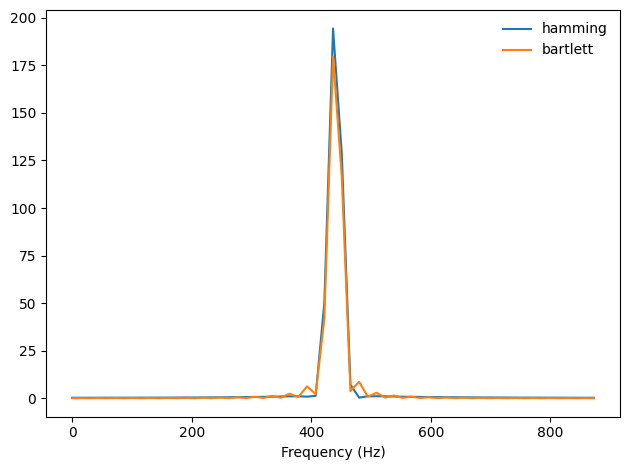

In [8]:
from thinkdsp import SinSignal
from numpy import bartlett

signal = SinSignal(freq=440)
duration = signal.period * 30.25
wave = signal.make_wave(duration)
wave.hamming()
spectrum_orig = wave.make_spectrum()
wave = signal.make_wave(duration)
wave.ys *= bartlett(len(wave.ys))
spectrum_win = wave.make_spectrum()
spectrum_orig.plot(high=880, label="hamming")
spectrum_win.plot(high=880, label="bartlett")
decorate(xlabel="Frequency (Hz)")

Окно Хэмминга явнее выделяет частоту сигнала и дает меньшую утечку. Окно Бартлетта показывает схожую утечку, однако заметны колебания вокруг пика.

## Упражнение 3.2
Написать класс, называемый SawtoothChirp, расширяющий Chirp и переопределяющий evaluate для генерации пилообразного сигнала с линейно увеличивающейся (или уменьшающейся) частотой.

In [ ]:
from thinkdsp import Chirp
from thinkdsp import normalize, unbias

class SawtoothChirp(Chirp):
    def evaluate(self, ts):
        freqs = np.linspace(self.start, self.end, len(ts))
        dts = np.diff(ts, prepend=0)
        dphis = 2 * np.pi * freqs * dts
        phases = np.cumsum(dphis)
        cycles = phases / 2 / np.pi
        frac, _ = np.modf(cycles)
        ys =  normalize(unbias(frac), self.amp)
        return ys

График сигнала:

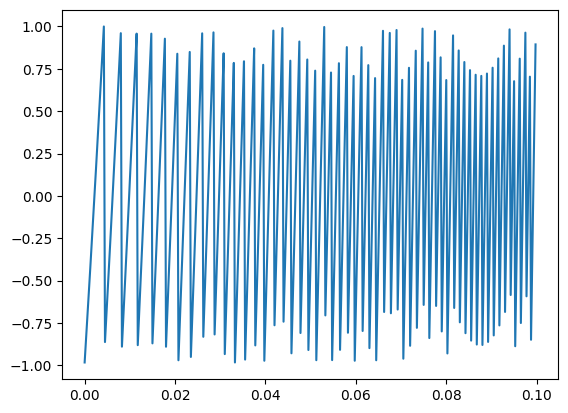

In [14]:
signal_sc = SawtoothChirp(start=220, end=880)
wave_sc = signal_sc.make_wave(duration=2, framerate=4000)
wave_sc_for_plot = signal_sc.make_wave(duration=0.1, framerate=4000)
wave_sc_for_plot.plot()

Спектрограмма сигнала

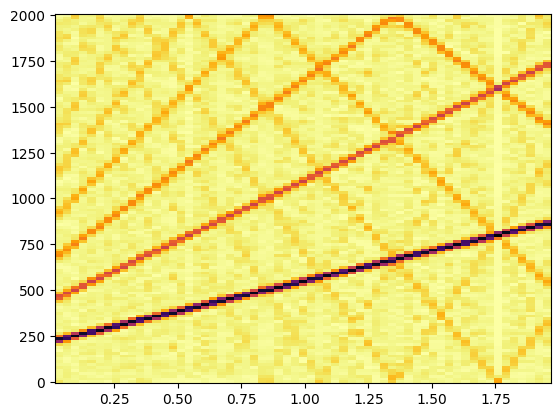

In [15]:
spectrum_sc = wave_sc.make_spectrogram(256)
spectrum_sc.plot()

На спектрограмме заметны гармоники, угловой коэффициент роста частоты каждой из которых пропорционален порядку. Биения выглядят как "отражения" прямых от краев спектрограммы. 

## Упражнение 3.3
Создать пилообразный чирп, меняющийся от 2500 до 3000 Гц, и на его основе сгенерировать сигнал 1 с и частотой кадров 20 кГц, распечатать Spectrum.

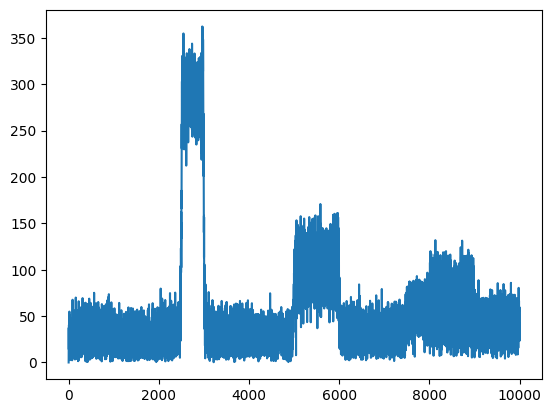

In [17]:
sc_3_3 = SawtoothChirp(start=2500, end=3000)
wave_3_3 = sc_3_3.make_wave(duration=1, framerate=20000)
wave_3_3.make_spectrum().plot()

На спектре заметны поднятые области на промежутке 2500-3000 Гц (изменение основной частоты), а также на промежутках 5000-6000 Гц, 7500-9000 Гц (гармоники). Кроме того заметно наложение биения 4-й гармоники (8000-1000 Гц, особенно на 8000-9000 Гц из-за сложения с 3-й гармоникой). Кроме того факт изменения частоты дал заметный шум.

## Упражнение 3.4
Найти или записать звук глиссандо и распечатать спектрограмму первых нескольких секунд.
С сайта freesound.org была скачана запись глиссандо на скрипке (https://freesound.org/people/Carlos_Vaquero/sounds/153629/)

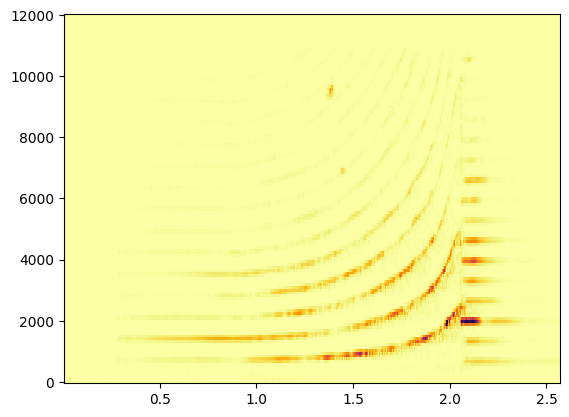

In [18]:
from thinkdsp import read_wave
gliss_wave = read_wave("153629_2626346-lq.wav")
gliss_sg = gliss_wave.make_spectrogram(256)
gliss_sg.plot()

На спектрограмме видно, что данное глиссандо - экспоненциальный чирп, крутизна роста частоты гармоник зависит от их порядков.

## Упражнение 3.5
Написать класс, называемый TromboneGliss, расширяющий Chirp и предоставляющий evaluate. Создать сигнал, имитирующий глиссандо на тромбоне от С3 до F3, и обратно до С3. Напечатать спектрограмму полученного сигнала.

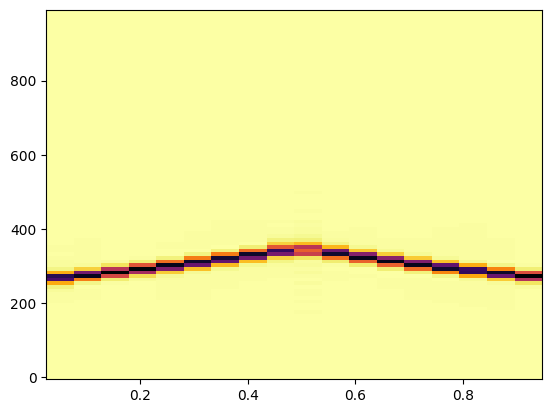

In [30]:
class TromboneGliss(Chirp):
    def evaluate(self, ts):
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts))
        freqs = 1 / lengths
        dts = np.diff(ts, prepend=0)
        dphis = 2 * np.pi * freqs * dts
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys

t_wave_1 = TromboneGliss(start=262, end=349).make_wave(duration = 0.5, framerate=40000)
t_wave_1.apodize()
t_wave_2 = TromboneGliss(start=349, end=262).make_wave(duration = 0.5, framerate=40000)
t_wave_2.apodize()
t_wave = t_wave_1 | t_wave_2
t_wave.make_spectrogram(4096).plot(high=1000)

Характер чирпа по данной спектрограмме определить невозможно в силу малого изменения частоты. Для определения характера чирпа был создан сигнал с большей разницей.

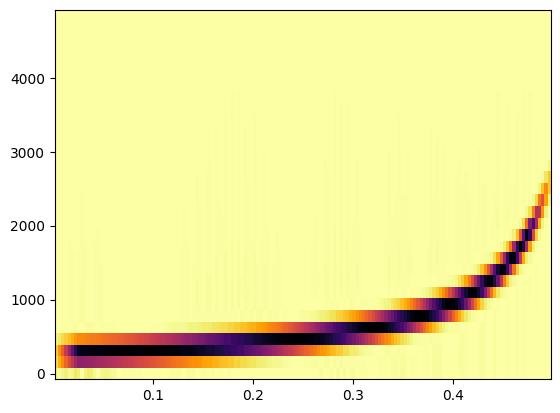

In [23]:
t_wave_big = TromboneGliss(start=262, end=2792).make_wave(duration = 0.5, framerate=40000)
t_wave_big.apodize()
t_wave_big.make_spectrogram(256).plot(high=5000)

Явно видно, что чирп экспоненциальный.

## Упражнение 3.6
Сделать или найти запись серии гласный звуков и посмотреть на спектрограмму.
Была взята запись с сайта freesound.org (https://freesound.org/people/PerMagnusLindborg/sounds/223696/)

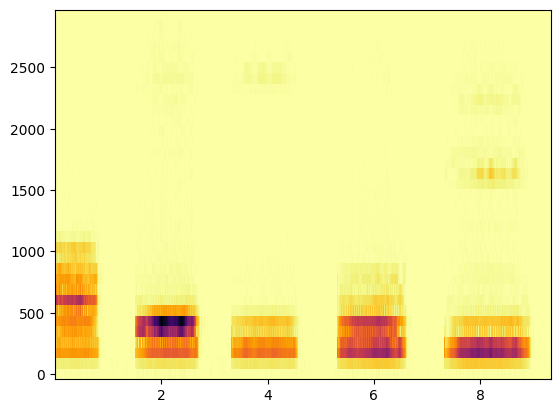

In [28]:
vowels_wave = read_wave("223696_4157407-lq.wav")
vowels_sg = vowels_wave.make_spectrogram(512)
vowels_sg.plot(high=3000)

Гласные можно различить по характеру гармоник и распределению амплитуд частот вокруг фундаментальной.